# Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from noise import pnoise2
from perlin_noise import PerlinNoise

ModuleNotFoundError: No module named 'noise'

# Noise test

In [ ]:
# import cv2
# import numpy as np

# # Read the input image
# img = cv2.imread('l-system-3-iterations.png', 0)
# plt.imshow(img)

# # Define the kernel
# kernel = np.ones((5, 5), np.uint8)

# # Apply dilation
# img_dilation = cv2.erode(img, kernel, iterations=1)

# plt.imshow(img_dilation)

In [ ]:
# Generate a 2D grid of Perlin noise
image = cv2.imread('l-system-3-iterations-dilated.png', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

scale = 12
grid = [[pnoise2(i/scale, j/scale, octaves = 4, persistence = 0.01, lacunarity = 3) for j in range(height)] for i in range(width)]
grid = np.array(grid)

perlin_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.5, perlin_noise, 0.5, 0)
# Visualize the noise
plt.imshow(noisy_image, cmap='gray')

In [ ]:
noise = PerlinNoise(octaves=8, seed=42)

grid = [[noise([i/width, j/height]) for j in range(height)] for i in range(width)]
grid = np.array(grid)
perlin_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, perlin_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')

In [ ]:
import opensimplex
opensimplex.seed(42)

grid = [[opensimplex.noise2(i, j) for j in range(height)] for i in range(width)]
grid = np.array(grid)
simplex_noise = cv2.normalize(grid, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, simplex_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')
# n = opensimplex.noise2(x=10, y=10)
# print(n)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt


class Point2D:
    def __init__(self, x, y):
        self.p = [x, y]

    def x(self):
        return (self.p[0])

    def y(self):
        return (self.p[1])

    def distance(point1, point2):
        import math
        return (math.sqrt((point1.x() - point2.x()) ** 2 + (point1.y() - point2.y()) ** 2))

    def getDistances(origin, li: list):
        distances = []
        for ll in li:
            distances.append(Point2D.distance(origin, Point2D(ll[0], ll[1])))
        return (distances)


class WorleyNoise:

    def __init__(self, height, width, density):

        self.height = height
        self.width = width
        self.density = density

    def auto(self, option):

        self.generatePoints()
        start = time.time()
        self.broadcastCalculateNoise(option)
        end = time.time()
        print("total time : " + str(end - start) + " seconds")
        self.showNoise()

    def generatePoints(self):
        self.points = []
        for _ in range(self.density):
            self.points.append([np.random.randint(0, self.width, 1)[0], np.random.randint(0, self.height, 1)[0]])

    def showPoints(self):
        plt.scatter([self.points[i][0] for i in range(len(self.points))],
                    [self.points[l][1] for l in range(len(self.points))])
        plt.show()

    def broadcastCalculateNoise(self, option):
        # casting points to numpy, it is of shape (nb_point, 2)
        points = np.array(self.points)
        # simple array of x and y coordinates for each coordinate
        xs = np.arange(self.width)
        ys = np.arange(self.height)
        # use the previously computed xs to get point.x - x for each x
        # notice the use of np.newaxis to control the broadcasting of the result to
        # an array of shape (nb_point, width)
        x_dist = np.power(points[:, 0, np.newaxis] - xs, 2)
        # same for ys, giving a (nb_point, height) shaped array
        y_dist = np.power(points[:, 1, np.newaxis] - ys, 2)
        # use the two last array to compute distance : sqrt((p.x - x) ** 2 + (.y - y ) ** 2))
        d = np.sqrt(x_dist[:, :, np.newaxis] + y_dist[:, np.newaxis, :])
        # d is of shape (nb_point, width, height), but we must sort it along the first axis
        distances = np.sort(d, axis=0)
        self.data = distances[option]

    def showNoise(self):
        import matplotlib.pyplot as plt
        plt.imshow(self.data, cmap="gray")
        plt.show()


w = WorleyNoise(height=height, width=width, density=50)
w.auto(0)

In [ ]:
worley_noise = cv2.normalize(w.data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
noisy_image = cv2.addWeighted(image, 0.3, worley_noise, 0.7, 0)
plt.imshow(noisy_image, cmap='gray')

In [ ]:
volume = np.load("l_systems_builder/examples/volumes/bush_tree.npy")

In [ ]:
volume.nonzero()
z,x,y = volume.nonzero()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= 'red')
plt.ion()
plt.show()

In [11]:
def visualize_voxel_slices(voxel_grid: np.ndarray, num_slices: int = 6):
        """
        Visualize evenly spaced slices from the voxel grid.
        Bottom slice (z=0) should show the stem.
        
        Args:
            voxel_grid: 3D numpy array (W, H, D)
            num_slices: Number of slices to display
        """
        W, H, D = voxel_grid.shape
        slice_indices = np.linspace(0, D-1, num_slices, dtype=int)
        
        fig, axes = plt.subplots(1, num_slices, figsize=(3*num_slices, 3))
        
        for i, z_idx in enumerate(slice_indices):
            slice_2d = voxel_grid[:,:,z_idx]
            axes[i].imshow(slice_2d.T, cmap='gray', origin='lower')
            axes[i].set_title(f'Slice z={z_idx}\n({slice_2d.sum()} voxels)')
            axes[i].axis('off')
        
        plt.suptitle('Voxel Grid Slices (z=0 is bottom)', fontsize=14)
        plt.tight_layout()
        plt.show()    

In [4]:
volume = np.load("root_volume_longZ.npy")

In [7]:
volume.shape

(16, 16, 64)

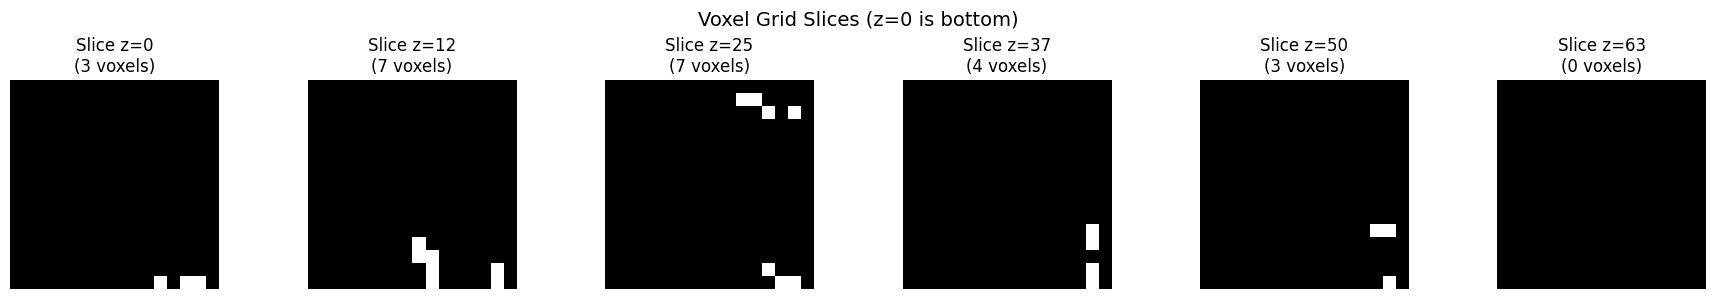

In [12]:
visualize_voxel_slices(volume, num_slices=6)

In [3]:
import numpy as np
from skimage.morphology import binary_dilation, disk

# Create a binary image
image = np.array([[0, 0, 0, 0, 0],
[0, 1, 1, 0, 0],
[0, 1, 1, 0, 0],
[0, 0, 0, 0, 0]], dtype=bool)

# Define a structuring element (disk-shaped footprint)
footprint = disk(1)

# Apply binary dilation
dilated_image = binary_dilation(image, footprint=footprint)

print(np.uint8(dilated_image))

[[0 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 0 0]]
